## Exploratory Data Analysis

In [1]:
#Let's begin by importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Let's load in our dataset
hr=pd.read_csv('data/Hotel_Reviews.csv')
#Taking a peak at our dataset
hr.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### 1.1 What is the shape of the dataset?

In [3]:
# Just to check if our dataset has any null-values
hr.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

lat and lng columns have a lot of null values which can be dropped later.

In [4]:
# Now checking the shape of our dataset
hr.shape

(515738, 17)

The shape of our dataset is 515738 rows and 17 columns.

In [5]:
# Making a copy is the best way to be cautious
hotel= hr.copy()

In [6]:
hotel.sample(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
443022,Scarsdale Place Kensington Kensington and Chel...,1831,12/20/2016,8.1,Copthorne Tara Hotel London Kensington,United Kingdom,Could maybe do with a lick of paint and gener...,16,7105,No Positive,0,6,7.9,"[' Leisure trip ', ' Family with young childre...",226 day,51.499046,-0.191707
232858,7 11 Queensberry Place Kensington and Chelsea ...,234,11/22/2016,6.9,Gainsborough Hotel,United Kingdom,How can u provide a wardrobe not only without...,60,1884,Great location for museums etc and close to tube,10,1,5.8,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",254 day,51.494842,-0.177206
18942,10 Godliman Street City of London London EC4V ...,788,7/18/2017,8.5,Grange St Paul s Hotel,United Kingdom,Initial room saw us on the ground floor where...,65,2635,Room service food was good Location is good A...,17,4,5.8,"[' Leisure trip ', ' Couple ', ' Superior Doub...",16 days,51.512763,-0.099716
463717,Stratton Street Mayfair Westminster Borough Lo...,581,11/28/2015,8.4,The May Fair Hotel,Switzerland,Underwhelming Staff were generally uninterest...,79,1994,No Positive,0,23,6.7,"[' Business trip ', ' Solo traveler ', ' Super...",614 day,51.507894,-0.143671
461944,Stadhouderskade 25 Oud Zuid 1071 ZD Amsterdam ...,297,11/5/2016,8.3,Park Hotel,Georgia,towels,2,2027,i like portera,4,4,7.5,"[' Leisure trip ', ' Couple ', ' Executive Roo...",271 day,52.361381,4.883259


### 1.2 The reviews provided are all given as decimal values. Convert them into integers from 1 to 1

Let's check the type of data for the column 'Reviewer_Score'

In [7]:
hotel['Reviewer_Score'].dtype

dtype('float64')

We can see here that the original data type for the 'Reviewer_Score' is float64.

Since the reviews range from 1 to 10 and have decimal values, just changing to an integer value will change a 3.9 review to a 3 which is a bad practice so it's better to round the value to it's nearest integer to keep our reviews accurate.

In [8]:
hotel['Reviewer_Score']= hotel['Reviewer_Score'].round(0).astype('int64')

After rounding the 'Reviewer_Score' column and changing the data type to integer we can confirm the data type once again to be sure.

In [9]:
hotel['Reviewer_Score'].dtype

dtype('int64')

In [10]:
# Checking the column to be sure
hotel['Reviewer_Score']

0         3
1         8
2         7
3         4
4         7
         ..
515733    7
515734    6
515735    2
515736    9
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64

### 1.3 The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

In order to get the idea of the distribution we can look at the times each review is stated.

In [11]:
hotel['Reviewer_Score'].value_counts().to_frame()

,Reviewer_Score
10,187744
8,110155
9,105722
7,44088
6,27800
5,24188
4,9436
3,4406
2,2199


We can see that people have given a review of 10 a lot followed by 8 and 9 and then it plummets. So we can expect a high distribution towards the end and low at the start. Let's look at a histogram distribution to get a better idea.

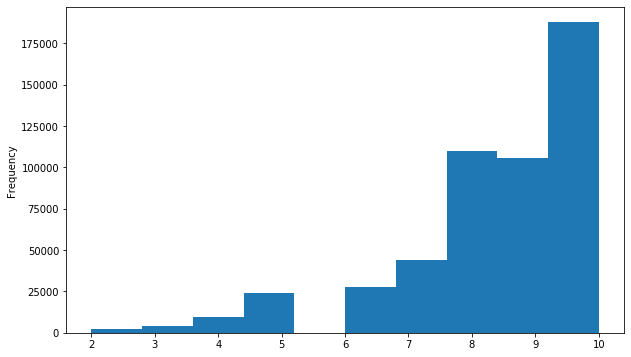

In [12]:
hotel['Reviewer_Score'].plot.hist(figsize=(10,6))

As expected the distribution starts with a low and increases as it reaches to 10.

### 1.4 Given this will be a classification problem, what is a potential problem with this distribution?

As we can see from the histogram that the distribution is not at all normal. To get a predictive analysis and build a model it is recommended to have a normal data for better results and accuracy.\
Also the data points which fall at the end are too high in compared to the start which says that the data set is too uneven. For building a model we need to train data for all points i.e for each individual value of a review in this case to get a better accuracy so that we can predict a data point at any set number review point.

### 2. This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In [13]:
# We can get the data type of every column by the .info command
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

Here we can see that the columns with int64 and float64 are numeric objects since and have numerical data in them.\
Thus the numeric columns are Additional_Number_of_Scoring,\
Average_Score, \
Review_Total_Negative_Word_Counts,\
Total_Number_of_Reviews,\
Review_Total_Pos,\
Total_Number_of_Reviews_Reviewer_Has_Given, \
Reviewer_Score,\
lat and lng.

Whereas all the object columns are non-numeric columns which are Hotel_Address, \
Review_Date, \
Hotel_Name,\
Reviewer_Nationality,\
Negative_Review,\
Positive_Review, \
Tags and days_since_review.

#### Yes we can convert some of the columns to numeric.
We can convert the 'days_since_review' into just the 'number' of days and also extract the days, months and years from the 'Review_Date' column. For the Reviewer_Nationality, we have a almost 200 Nationalities and almost 1500 rows for the 'Hotel_Name' which will be difficult to convert into numeric type for now.

## Data Wrangling

### 3.1 Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [14]:
# Let's make a copy again to not mess our data
hr2= hotel.copy()

As instructed, let's sample our data into 10% which makes it easier to work with.

In [15]:
# Setting the fraction size to be 10% of the overall dataset now
hr2 = hotel.sample(frac= 0.1)
hr2= hr2.reset_index().drop(columns='index')


Here, we can see that the rows have now gone down from ~500k to ~50k.

In [16]:
hr2

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Piazza Della Repubblica 17 Central Station 201...,241,10/6/2015,9.1,Hotel Principe Di Savoia,Saudi Arabia,No Negative,0,1543,everything is great and super,6,1,10,"[' Business trip ', ' Solo traveler ', ' Class...",667 day,45.479888,9.196298
1,Via Tortona 35 Navigli 20144 Milan Italy,162,8/29/2015,8.6,Nhow Milan,Germany,No Negative,0,2286,Nice design very good Wifi connection superb ...,10,50,9,"[' Leisure trip ', ' Solo traveler ', ' Standa...",705 day,45.451042,9.160654
2,Gran V a de les Corts Catalanes 322 Sants Mont...,391,2/13/2017,8.8,Ayre Hotel Gran V a,United Kingdom,nothing,3,4887,Hotel very modern Staff very helpfull and loc...,19,13,10,"[' Leisure trip ', ' Solo traveler ', ' Double...",171 day,41.373246,2.147435
3,52 Chiswell Street City of London London EC1Y ...,704,2/2/2016,8.8,The Montcalm At Brewery London City,United Kingdom,Although the breakfast was very good it felt ...,40,2617,The room was very comfortable only problem wa...,24,1,9,"[' Leisure trip ', ' Couple ', ' Club Double R...",548 day,51.520816,-0.091532
4,7 9 rue du Conservatoire 9th arr 75009 Paris F...,41,11/22/2015,9.0,Hotel de Nell,Israel,Breakfast price is too high,6,280,Great staff comfortable bed and well designed...,9,40,10,"[' Business trip ', ' Solo traveler ', ' 2 roo...",620 day,48.873279,2.346658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51569,Bloomsbury Way Camden London WC1A 2SD United K...,387,9/6/2016,8.5,Thistle Holborn The Kingsley,United Kingdom,Quite expensive,4,1593,Really helpful polite staff Good quality d co...,30,16,10,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",331 day,51.517966,-0.123434
51570,30 John Islip St Westminster Borough London SW...,807,2/13/2017,8.5,DoubleTree by Hilton London Westminster,United Kingdom,No Negative,0,3269,Room service breakfast was excellent value fo...,21,1,10,"[' Leisure trip ', ' Family with young childre...",171 day,51.493236,-0.126908
51571,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,260,8/18/2016,8.0,Suite Hotel 900 m zur Oper,Bulgaria,It was a little noise from the street,10,3461,Excellent small hotel very close to the city ...,23,8,9,"[' Leisure trip ', ' Couple ', ' Double Room '...",350 day,48.193523,16.366915
51572,Portland Place Westminster Borough London W1B ...,375,6/16/2016,9.3,The Langham London,United Kingdom,Nothing,2,1276,Everything,2,8,10,"[' Couple ', ' Superior Double Room ', ' Staye...",413 day,51.517876,-0.144065


In [17]:
# Checking the shape 
hr2.shape

(51574, 17)

In [18]:
# We can also see that all the classes are included in the column
hr2['Reviewer_Score'].value_counts()

10    18849
8     11083
9     10562
7      4457
6      2674
5      2367
4       925
3       440
2       217
Name: Reviewer_Score, dtype: int64

In [19]:
# Checking the column
hr2['Reviewer_Score']

0        10
1         9
2        10
3         9
4        10
         ..
51569    10
51570    10
51571     9
51572    10
51573     6
Name: Reviewer_Score, Length: 51574, dtype: int64

#### Let's change all the values now for reviews 2-8 as 0 signifying bad review and 9 and 10 to be 1 i.e good review in the 'Reviewer_Score' column

In [20]:
hr2['Reviewer_Score'].replace({2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:1,10:1}, inplace= True)
hr2['Reviewer_Score']

0        1
1        1
2        1
3        1
4        1
        ..
51569    1
51570    1
51571    1
51572    1
51573    0
Name: Reviewer_Score, Length: 51574, dtype: int64

In [21]:
# Checking up if the values are reflected in the dataset
hr2

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Piazza Della Repubblica 17 Central Station 201...,241,10/6/2015,9.1,Hotel Principe Di Savoia,Saudi Arabia,No Negative,0,1543,everything is great and super,6,1,1,"[' Business trip ', ' Solo traveler ', ' Class...",667 day,45.479888,9.196298
1,Via Tortona 35 Navigli 20144 Milan Italy,162,8/29/2015,8.6,Nhow Milan,Germany,No Negative,0,2286,Nice design very good Wifi connection superb ...,10,50,1,"[' Leisure trip ', ' Solo traveler ', ' Standa...",705 day,45.451042,9.160654
2,Gran V a de les Corts Catalanes 322 Sants Mont...,391,2/13/2017,8.8,Ayre Hotel Gran V a,United Kingdom,nothing,3,4887,Hotel very modern Staff very helpfull and loc...,19,13,1,"[' Leisure trip ', ' Solo traveler ', ' Double...",171 day,41.373246,2.147435
3,52 Chiswell Street City of London London EC1Y ...,704,2/2/2016,8.8,The Montcalm At Brewery London City,United Kingdom,Although the breakfast was very good it felt ...,40,2617,The room was very comfortable only problem wa...,24,1,1,"[' Leisure trip ', ' Couple ', ' Club Double R...",548 day,51.520816,-0.091532
4,7 9 rue du Conservatoire 9th arr 75009 Paris F...,41,11/22/2015,9.0,Hotel de Nell,Israel,Breakfast price is too high,6,280,Great staff comfortable bed and well designed...,9,40,1,"[' Business trip ', ' Solo traveler ', ' 2 roo...",620 day,48.873279,2.346658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51569,Bloomsbury Way Camden London WC1A 2SD United K...,387,9/6/2016,8.5,Thistle Holborn The Kingsley,United Kingdom,Quite expensive,4,1593,Really helpful polite staff Good quality d co...,30,16,1,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",331 day,51.517966,-0.123434
51570,30 John Islip St Westminster Borough London SW...,807,2/13/2017,8.5,DoubleTree by Hilton London Westminster,United Kingdom,No Negative,0,3269,Room service breakfast was excellent value fo...,21,1,1,"[' Leisure trip ', ' Family with young childre...",171 day,51.493236,-0.126908
51571,Wiedner Hauptstra e 44 04 Wieden 1040 Vienna A...,260,8/18/2016,8.0,Suite Hotel 900 m zur Oper,Bulgaria,It was a little noise from the street,10,3461,Excellent small hotel very close to the city ...,23,8,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",350 day,48.193523,16.366915
51572,Portland Place Westminster Borough London W1B ...,375,6/16/2016,9.3,The Langham London,United Kingdom,Nothing,2,1276,Everything,2,8,1,"[' Couple ', ' Superior Double Room ', ' Staye...",413 day,51.517876,-0.144065


### 3.2 Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

#### Changing the  'days_since_review' column to numeric:

If we take a look at the 'days_since_review' column we can see that the column has numeric value followed with 'days' as a string. We can take out 'days' and then convert the data type to be numeric.

In [22]:
hr2['days_since_review']

0        667 day
1        705 day
2        171 day
3        548 day
4        620 day
          ...   
51569    331 day
51570    171 day
51571    350 day
51572    413 day
51573    114 day
Name: days_since_review, Length: 51574, dtype: object

In [23]:
# Replacing the days in the column 
hr2['days_since_review']= (hr2['days_since_review'].str.replace('days', ""))

In [24]:
# Replacing the day in the column
hr2['days_since_review']= (hr2['days_since_review'].str.replace('day', ""))

In [25]:
# Changing the data type
hr2['days_since_review']= hr2['days_since_review'].astype('int64')

In [26]:
hr2['days_since_review']

0        667
1        705
2        171
3        548
4        620
        ... 
51569    331
51570    171
51571    350
51572    413
51573    114
Name: days_since_review, Length: 51574, dtype: int64

Now we can see that we have converted the column to numeric and changed the data type.

In [27]:
hr2.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Piazza Della Repubblica 17 Central Station 201...,241,10/6/2015,9.1,Hotel Principe Di Savoia,Saudi Arabia,No Negative,0,1543,everything is great and super,6,1,1,"[' Business trip ', ' Solo traveler ', ' Class...",667,45.479888,9.196298
1,Via Tortona 35 Navigli 20144 Milan Italy,162,8/29/2015,8.6,Nhow Milan,Germany,No Negative,0,2286,Nice design very good Wifi connection superb ...,10,50,1,"[' Leisure trip ', ' Solo traveler ', ' Standa...",705,45.451042,9.160654
2,Gran V a de les Corts Catalanes 322 Sants Mont...,391,2/13/2017,8.8,Ayre Hotel Gran V a,United Kingdom,nothing,3,4887,Hotel very modern Staff very helpfull and loc...,19,13,1,"[' Leisure trip ', ' Solo traveler ', ' Double...",171,41.373246,2.147435
3,52 Chiswell Street City of London London EC1Y ...,704,2/2/2016,8.8,The Montcalm At Brewery London City,United Kingdom,Although the breakfast was very good it felt ...,40,2617,The room was very comfortable only problem wa...,24,1,1,"[' Leisure trip ', ' Couple ', ' Club Double R...",548,51.520816,-0.091532
4,7 9 rue du Conservatoire 9th arr 75009 Paris F...,41,11/22/2015,9.0,Hotel de Nell,Israel,Breakfast price is too high,6,280,Great staff comfortable bed and well designed...,9,40,1,"[' Business trip ', ' Solo traveler ', ' 2 roo...",620,48.873279,2.346658


#### Looking over the 'Review_Date' column:

In [28]:
hr2['Review_Date'].dtype

dtype('O')

The data type of the 'Review_Date' column is an object. Let's convert the data type to date time so that we can extract the dates, months and years from the data.

In [29]:
import datetime
hr2['Review_Date']= pd.to_datetime(hr2['Review_Date'])
hr2['Review_Date']

0       2015-10-06
1       2015-08-29
2       2017-02-13
3       2016-02-02
4       2015-11-22
           ...    
51569   2016-09-06
51570   2017-02-13
51571   2016-08-18
51572   2016-06-16
51573   2017-04-11
Name: Review_Date, Length: 51574, dtype: datetime64[ns]

In [30]:
# Creating new numeric columns from our 'Review_Date' and dropping it
hr2['review_month'] = hr2['Review_Date'].dt.month
hr2['review_year'] = hr2['Review_Date'].dt.year
hr2['review_day'] = hr2['Review_Date'].dt.day
hr2= hr2.drop(columns= ['Review_Date'])
hr2.sample(5)

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review_month,review_year,review_day
27857,22 Portman Square Westminster Borough London W...,597,7.9,Radisson Blu Portman Hotel London,Israel,Can t think of anything I really enjoyed my s...,12,2308,Excellent location very helpful staff Best br...,18,5,1,"[' Leisure trip ', ' Couple ', ' Standard Doub...",261,51.516191,-0.157949,11,2016,15
11184,17 25 Sloane Street Knightsbridge Kensington a...,759,7.5,Millennium Hotel London Knightsbridge,Saudi Arabia,everything,2,2746,nothing,2,1,0,"[' Leisure trip ', ' Couple ', ' Standard Twin...",318,51.499968,-0.159993,9,2016,19
34581,Taborstra e 12 02 Leopoldstadt 1020 Vienna Aus...,404,9.1,Hotel Stefanie,Australia,No Negative,0,3883,Hotel was clean and reasonably close to every...,29,3,1,"[' Leisure trip ', ' Group ', ' Single Room ',...",709,48.214277,16.380178,8,2015,25
32267,Hendrikje Stoffelstraat 1 Slotervaart 1058 GC ...,757,8.7,WestCord Fashion Hotel Amsterdam,Ireland,Bit far from heart of Amsterdam but 3 5 min w...,78,5236,Beds were very comfortable staff were friendl...,21,2,0,"[' Leisure trip ', ' Couple ', ' Large Double ...",169,52.357655,4.844576,2,2017,15
3520,Landstra er G rtel 5 03 Landstra e 1030 Vienna...,101,8.5,Hotel Daniel Vienna,United Kingdom,No Negative,0,1405,The chocolate crunch cereal,6,7,1,"[' Leisure trip ', ' Couple ', ' Panorama Doub...",465,NaN,NaN,4,2016,25


In [31]:
# We can check our newly formed data columns which are now in integer form i.e numeric
hr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51574 entries, 0 to 51573
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51574 non-null  object 
 1   Additional_Number_of_Scoring                51574 non-null  int64  
 2   Average_Score                               51574 non-null  float64
 3   Hotel_Name                                  51574 non-null  object 
 4   Reviewer_Nationality                        51574 non-null  object 
 5   Negative_Review                             51574 non-null  object 
 6   Review_Total_Negative_Word_Counts           51574 non-null  int64  
 7   Total_Number_of_Reviews                     51574 non-null  int64  
 8   Positive_Review                             51574 non-null  object 
 9   Review_Total_Positive_Word_Counts           51574 non-null  int64  
 10  Total_Numb

In [32]:
# Looking at our 'Hotel_Name' value counts
hr2['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf                488
Park Plaza Westminster Bridge London                      443
Strand Palace Hotel                                       428
Copthorne Tara Hotel London Kensington                    355
DoubleTree by Hilton Hotel London Tower of London         346
                                                         ... 
Villa Alessandra                                            1
Arioso                                                      1
Hotel Stendhal Place Vend me Paris MGallery by Sofitel      1
The Zetter Townhouse Clerkenwell                            1
Hotel Gallitzinberg                                         1
Name: Hotel_Name, Length: 1473, dtype: int64

In [33]:
# Looking at our 'Reviewer_Nationality' value counts
hr2['Reviewer_Nationality'].value_counts()

 United Kingdom               24248
 United States of America      3647
 Australia                     2166
 Ireland                       1446
 United Arab Emirates          1052
                              ...  
 Benin                            1
 Suriname                         1
 Martinique                       1
 Cambodia                         1
 Mozambique                       1
Name: Reviewer_Nationality, Length: 183, dtype: int64

As I mentioned earlier that it's difficult to convert other non-numeric columns because it has too many unique values, we can see that the 'Hotel_Name' has 1473 unique values and the 'Reviewer_Nationality' has 183 unique values which would be hard to convert them into numeric so we can drop the non- numeric columns as suggested except positive and negative review. Although the lat and lng columns have some null values they are still numeric so let's keep them for now.

In [34]:
hr2= hr2.drop(columns=['Hotel_Name','Hotel_Address','Reviewer_Nationality','Tags'])
hr2.sample()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,review_month,review_year,review_day
20113,434,8.4,Everything was good,5,1494,Booked this hotel as was going to Royal Alber...,91,4,1,144,51.511521,-0.290706,3,2017,12


Now, we don't have any non-numeric columns except 'Positive_Review' and 'Negative_Review'

### 3.3 Split the data into train and test sets.

In [35]:
# Let's select our features and split them into X and target variable y
# Selecting all other columns except our target variable 'Reviewer_Score'
X= hr2.drop(columns= ['Reviewer_Score'])
X.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,review_month,review_year,review_day
0,241,9.1,No Negative,0,1543,everything is great and super,6,1,667,45.479888,9.196298,10,2015,6
1,162,8.6,No Negative,0,2286,Nice design very good Wifi connection superb ...,10,50,705,45.451042,9.160654,8,2015,29
2,391,8.8,nothing,3,4887,Hotel very modern Staff very helpfull and loc...,19,13,171,41.373246,2.147435,2,2017,13
3,704,8.8,Although the breakfast was very good it felt ...,40,2617,The room was very comfortable only problem wa...,24,1,548,51.520816,-0.091532,2,2016,2
4,41,9.0,Breakfast price is too high,6,280,Great staff comfortable bed and well designed...,9,40,620,48.873279,2.346658,11,2015,22


In [36]:
# Selecting our target variable
y= hr2['Reviewer_Score']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reviewer_Score, dtype: int64

In [37]:
# Let's import our library used to make a split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.5,stratify= y)

In [38]:
X_train

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,review_month,review_year,review_day
6849,154,8.6,No Negative,0,931,The location and the staff The breakfast was ...,11,1,611,41.394485,2.165108,12,2015,1
8263,226,8.3,Maybe tea coffee in the room,8,3308,Very good breakfast Location is superb for th...,12,19,233,48.187726,16.378145,12,2016,13
10584,390,7.6,I paid by my credit card at arrival and front...,100,4646,Room was renovated and very modern compare us...,32,49,21,41.379205,2.142799,7,2017,13
42302,384,9.2,No Negative,0,4017,Best breakfast buffet of any hotel Everything...,28,67,100,45.482669,9.203437,4,2017,25
5240,100,7.5,Costumer service they would rather argue me d...,30,714,Location and comfort,4,1,182,51.574355,-0.097757,2,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32025,85,7.6,I made a reservation on booking com indicatin...,165,2122,Breakfast,2,1,370,45.443791,9.152947,7,2016,29
8845,223,8.2,Expensive,2,1878,Location,2,1,498,41.378098,2.176201,3,2016,23
32312,132,8.3,Smaller rooms but that s typical of the area,11,1174,Loved the location Easy access to Metro and a...,18,1,89,48.852843,2.342226,5,2017,6
31605,439,8.0,No Negative,0,3633,Great location swimming pool great staff so m...,18,3,3,41.393559,2.199391,7,2017,31


### 3.4 Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

#### Let's start with converting our 'Positive_Review' into a aparse matrix first

In [39]:
# Let's import our library first
from sklearn.feature_extraction.text import CountVectorizer

# Initiating our count vectorizer, it's best practice to keep the min_df 5 so it avoids less frequent words.
bag = CountVectorizer(min_df= 5)

# 2. Fitting our column
bag.fit(hr2['Positive_Review'])

# 3. And then transforming
positive_review_sparse = bag.transform(hr2['Positive_Review'])
positive_review_sparse

<51574x4317 sparse matrix of type '<class 'numpy.int64'>'
	with 689576 stored elements in Compressed Sparse Row format>

As we have the column in a compressed sparse format, let's convert it into an array format so that we can then convert it into a sparse matrix.

In [40]:
# For converting to array
positive_review_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
# Converting into a sparse matrix
positive_review_matrix= positive_review_sparse.todense()
positive_review_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
# We can also display it in a dataframe
my_df = pd.DataFrame(columns=bag.get_feature_names(), data=positive_review_sparse.toarray())
display(my_df)

,00,00am,02,10,100,100m,10am,10min,10mins,10th,...,you,young,younger,your,yourself,yummy,ziggo,zone,zoo,zuid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51569,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's repeat the process again for our 'Negative_Review' column

In [43]:
# 1. Initiating
bag2 = CountVectorizer(min_df= 5)

# 2. Fitting
bag2.fit(hr2['Negative_Review'])

# 3. Transforming
negative_review_sparse = bag2.transform(hr2['Negative_Review'])
negative_review_sparse 

<51574x5336 sparse matrix of type '<class 'numpy.int64'>'
	with 691625 stored elements in Compressed Sparse Row format>

In [44]:
# Converting to array
negative_review_sparse.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [45]:
# Converting it into sparse matrix
negative_review_matrix= negative_review_sparse.todense()
negative_review_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
# Let's take a look at our columns for the numeric data 
hr2.columns

Index(['Additional_Number_of_Scoring', 'Average_Score', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'review_month', 'review_year',
       'review_day'],
      dtype='object')

In [47]:
# Selecting all our numeric columns and converting it into a numpy array
numeric_columns= hr2[['Additional_Number_of_Scoring', 'Average_Score','Review_Total_Negative_Word_Counts',
                      'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
                      'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
                       'days_since_review', 'lat', 'lng', 'review_month', 'review_year','review_day']].to_numpy()

In [48]:
# Converting it into a compressed sparse matrix first
from scipy import sparse,hstack
numeric_sparse= sparse.csr_matrix(numeric_columns)
numeric_sparse

<51574x13 sparse matrix of type '<class 'numpy.float64'>'
	with 631734 stored elements in Compressed Sparse Row format>

In [49]:
numeric_matrix= numeric_sparse.todense()
numeric_matrix

matrix([[2.410e+02, 9.100e+00, 0.000e+00, ..., 1.000e+01, 2.015e+03,
         6.000e+00],
        [1.620e+02, 8.600e+00, 0.000e+00, ..., 8.000e+00, 2.015e+03,
         2.900e+01],
        [3.910e+02, 8.800e+00, 3.000e+00, ..., 2.000e+00, 2.017e+03,
         1.300e+01],
        ...,
        [2.600e+02, 8.000e+00, 1.000e+01, ..., 8.000e+00, 2.016e+03,
         1.800e+01],
        [3.750e+02, 9.300e+00, 2.000e+00, ..., 6.000e+00, 2.016e+03,
         1.600e+01],
        [5.240e+02, 8.200e+00, 2.600e+01, ..., 4.000e+00, 2.017e+03,
         1.100e+01]])

In [50]:
numeric_matrix.shape

(51574, 13)

In [51]:
from scipy import hstack

Now, let's combine all 3 matrices as asked into one:

In [52]:
combined_matrices= sparse.hstack((positive_review_sparse, negative_review_sparse, numeric_sparse))  
combined_matrices

<51574x9666 sparse matrix of type '<class 'numpy.float64'>'
	with 2012935 stored elements in COOrdinate format>

We get a compressed sparse matrix with all three columns combined i.e the 'Positive_review', 'Negative_Review' and the numeric columns.

In [53]:
# We can also convert it into an array and see the results.
combined_matrices.toarray()

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 2.015e+03,
        6.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 2.015e+03,
        2.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.017e+03,
        1.300e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 2.016e+03,
        1.800e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e+00, 2.016e+03,
        1.600e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 2.017e+03,
        1.100e+01]])

In [54]:
# We can also display the combined matrices in a matrix form
combined_matrices.todense()

matrix([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+01, 2.015e+03,
         6.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 2.015e+03,
         2.900e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.017e+03,
         1.300e+01],
        ...,
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.000e+00, 2.016e+03,
         1.800e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.000e+00, 2.016e+03,
         1.600e+01],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 2.017e+03,
         1.100e+01]])

### 3.5 What does the min_df parameter do?

min_df parameter basically sets a limit so that it doesn't include the count of words i.e frequency below a set number of limit.\
For example, if min_df is set to 5 the array will not include any words which have been repeated for less than 5 times.